In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import cm
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

In [2]:
data = "./Task/german_credit_data.csv"

In [3]:
df = pd.read_csv(data)

In [4]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [5]:
df = df[df.columns[1:]]

In [6]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [71]:
print("Unique values in each categorical column:")
for col in df.select_dtypes(include = [object]).columns:
    print(col,":", df[col].unique())

Unique values in each categorical column:
Sex : ['male' 'female']
Housing : ['own' 'free' 'rent']
Saving accounts : ['not defined' 'little' 'quite rich' 'rich' 'moderate']
Checking account : ['little' 'moderate' 'not defined' 'rich']
Purpose : ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


# EDA

## Data cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [8]:
df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [9]:
#bad = 1, good = 0
df['Risk'] = (df['Risk'] == 'bad')*1

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
df.describe()

,Age,Job,Credit amount,Duration,Risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000,0.300000
std,11.375469,0.653614,2822.736876,12.058814,0.458487
min,19.000000,0.000000,250.000000,4.000000,0.000000
25%,27.000000,2.000000,1365.500000,12.000000,0.000000
50%,33.000000,2.000000,2319.500000,18.000000,0.000000
75%,42.000000,2.000000,3972.250000,24.000000,1.000000
max,75.000000,3.000000,18424.000000,72.000000,1.000000


In [11]:
df[df.duplicated(keep="first")].count()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [12]:
df['Saving accounts'].unique()

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [13]:
df['Checking account'].unique()

array(['little', 'moderate', nan, 'rich'], dtype=object)

In [14]:
df['Saving accounts'].fillna('not defined', inplace = True)
df['Checking account'].fillna('not defined', inplace = True)

C:\Users\dnurymzhan001\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


## Data visualization

In [15]:
list(df.columns)

['Age',
 'Sex',
 'Job',
 'Housing',
 'Saving accounts',
 'Checking account',
 'Credit amount',
 'Duration',
 'Purpose',
 'Risk']

Text(0.5, 1.0, 'Age distribution')

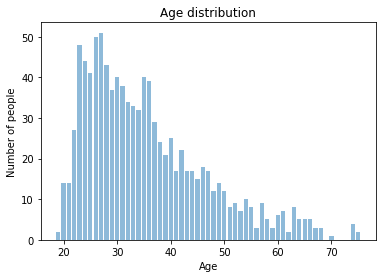

In [16]:
age_distr = df['Age'].value_counts()

plt.bar(age_distr.index, age_distr.values, align='center', alpha=0.5)
plt.ylabel('Number of people')
plt.xlabel('Age')
plt.title('Age distribution')

Text(0.5, 1.0, 'Age distribution')

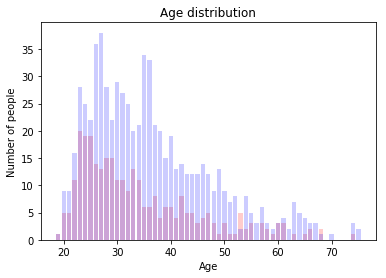

In [17]:
bad_age = df[df['Risk'] == 1]['Age'].value_counts()
good_age = df[df['Risk'] == 0]['Age'].value_counts()

plt.bar(bad_age.index, bad_age.values, align='center', color = 'red', alpha = 0.2)
plt.bar(good_age.index, good_age.values, align='center', color = 'blue', alpha = 0.2)
plt.ylabel('Number of people')
plt.xlabel('Age')
plt.title('Age distribution')

Text(0.5, 1.0, 'Distribution by sex')

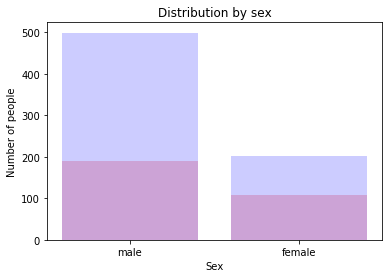

In [18]:
bad_sex = df[df['Risk'] == 1]['Sex'].value_counts()
good_sex = df[df['Risk'] == 0]['Sex'].value_counts()

plt.bar(bad_sex.index, bad_sex.values, align='center', color = 'red', alpha = 0.2)
plt.bar(good_sex.index, good_sex.values, align='center', color = 'blue', alpha = 0.2)
plt.ylabel('Number of people')
plt.xlabel('Sex')
plt.title('Distribution by sex')

Text(0.5, 1.0, 'Distribution by job')

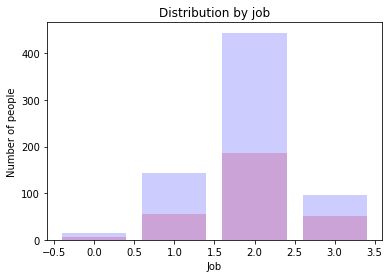

In [19]:
bad_job = df[df['Risk'] == 1]['Job'].value_counts()
good_job = df[df['Risk'] == 0]['Job'].value_counts()

plt.bar(bad_job.index, bad_job.values, align='center', color = 'red', alpha = 0.2)
plt.bar(good_job.index, good_job.values, align='center', color = 'blue', alpha = 0.2)
plt.ylabel('Number of people')
plt.xlabel('Job')
plt.title('Distribution by job')

Text(0.5, 1.0, 'Distribution by housing')

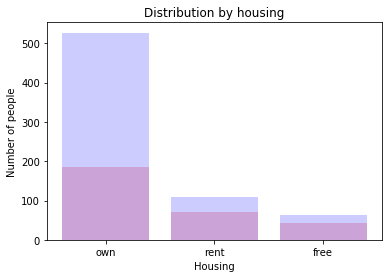

In [20]:
bad_housing = df[df['Risk'] == 1]['Housing'].value_counts()
good_housing = df[df['Risk'] == 0]['Housing'].value_counts()

plt.bar(bad_housing.index, bad_housing.values, align='center', color = 'red', alpha = 0.2)
plt.bar(good_housing.index, good_housing.values, align='center', color = 'blue', alpha = 0.2)
plt.ylabel('Number of people')
plt.xlabel('Housing')
plt.title('Distribution by housing')

Text(0.5, 1.0, 'Distribution by duration')

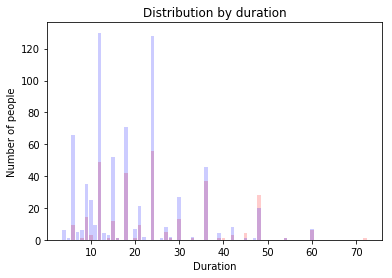

In [21]:
bad_duration = df[df['Risk'] == 1]['Duration'].value_counts()
good_duration = df[df['Risk'] == 0]['Duration'].value_counts()

plt.bar(bad_duration.index, bad_duration.values, align='center', color = 'red', alpha = 0.2)
plt.bar(good_duration.index, good_duration.values, align='center', color = 'blue', alpha = 0.2)
plt.ylabel('Number of people')
plt.xlabel('Duration')
plt.title('Distribution by duration')

Text(0.5, 1.0, 'Distribution by duration')

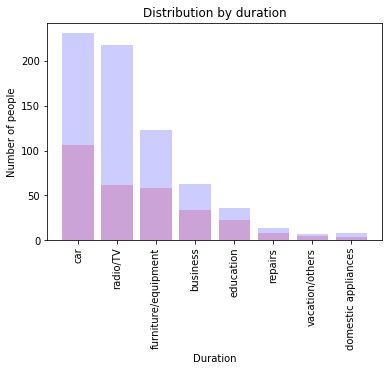

In [22]:
bad_purpose = df[df['Risk'] == 1]['Purpose'].value_counts()
good_purpose = df[df['Risk'] == 0]['Purpose'].value_counts()

plt.bar(bad_purpose.index, bad_purpose.values, align='center', color = 'red', alpha = 0.2)
plt.bar(good_purpose.index, good_purpose.values, align='center', color = 'blue', alpha = 0.2)
plt.ylabel('Number of people')
plt.xlabel('Duration')
plt.xticks(rotation=90)
plt.title('Distribution by duration')

Text(0.5, 1.0, 'Distribution by Risk')

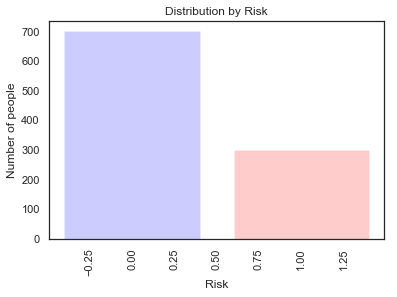

In [51]:
bad_risk = df[df['Risk'] == 1]['Risk'].value_counts()
good_risk = df[df['Risk'] == 0]['Risk'].value_counts()

plt.bar(bad_risk.index, bad_risk.values, align='center', color = 'red', alpha = 0.2)
plt.bar(good_risk.index, good_risk.values, align='center', color = 'blue', alpha = 0.2)

plt.ylabel('Number of people')
plt.xlabel('Risk')
plt.xticks(rotation=90)
plt.title('Distribution by Risk')

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning:

JointGrid annotation is deprecated and will be removed in a future release.



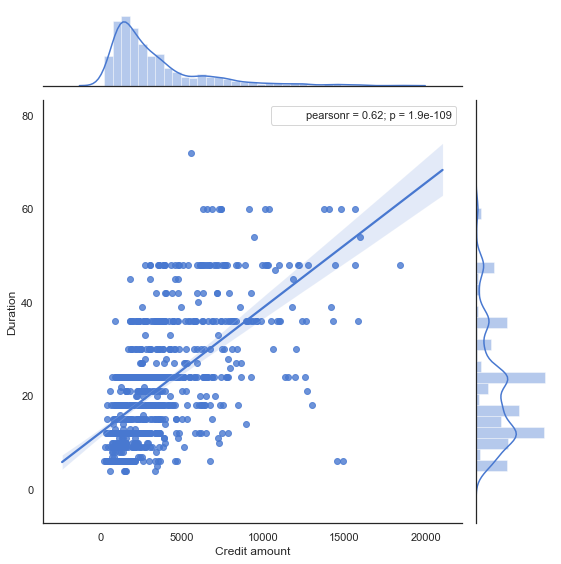

In [73]:
import scipy.stats as stats
r1 = sns.jointplot(x="Credit amount",y="Duration", data=df, kind="reg", height=8)
r1.annotate(stats.pearsonr)
plt.show()

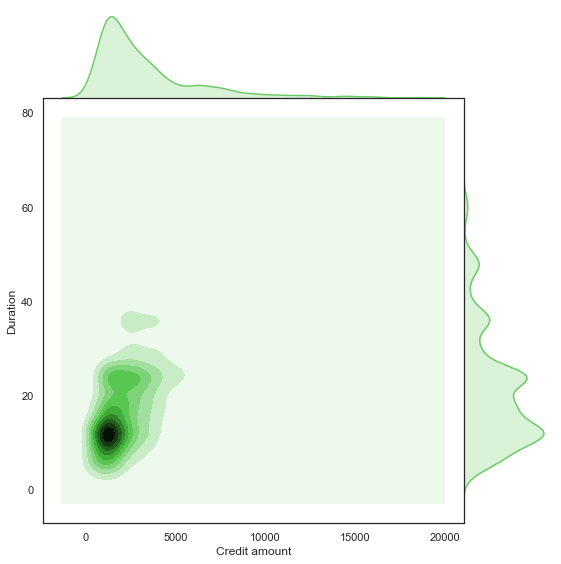

In [84]:
sns.jointplot("Credit amount","Duration", data=df, kind="kde", space=0, color="g",  height=8)
plt.show()

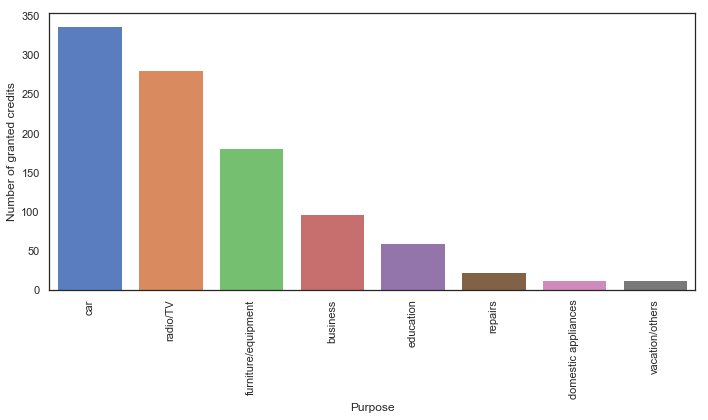

In [83]:
n_credits = df.groupby("Purpose")["Age"].count().rename("Count").reset_index()
n_credits.sort_values(by=["Count"], ascending=False, inplace=True)

plt.figure(figsize=(10,6))
bar = sns.barplot(x="Purpose",y="Count",data=n_credits)
bar.set_xticklabels(bar.get_xticklabels(), rotation=90)
plt.ylabel("Number of granted credits")
plt.tight_layout()

In [89]:
def boxes(x,y,h,r=90):
    fig, ax = plt.subplots(figsize=(10,6))
    box = sns.boxplot(x=x,y=y, hue=h, data=df)
    box.set_xticklabels(box.get_xticklabels(), rotation=r)
    fig.subplots_adjust(bottom=0.2)
    plt.tight_layout()

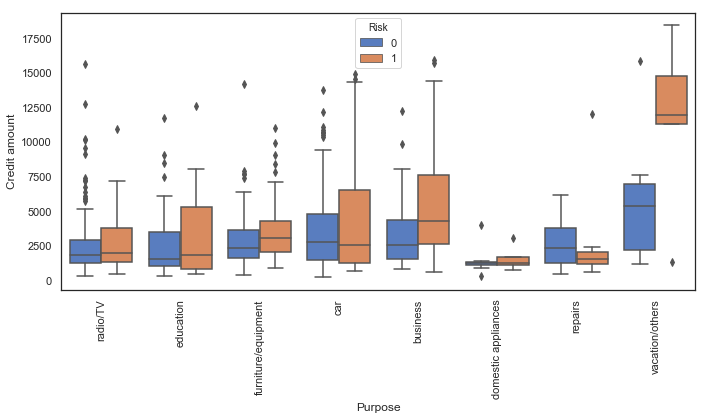

In [90]:
boxes("Purpose","Credit amount","Risk")

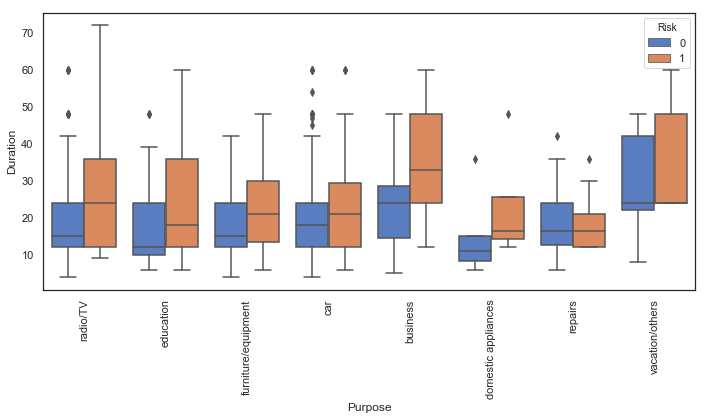

In [91]:
boxes("Purpose","Duration","Risk")

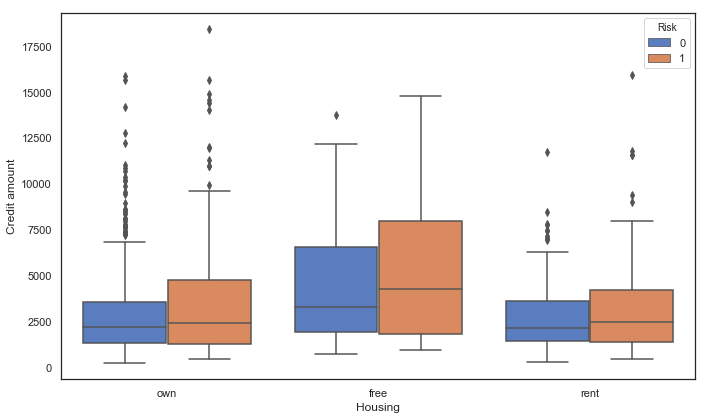

In [93]:
boxes("Housing","Credit amount","Risk",r=0)

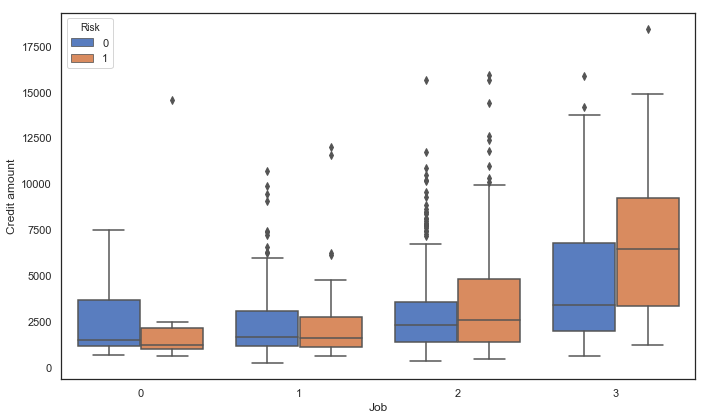

In [94]:
boxes("Job","Credit amount","Risk",r=0)

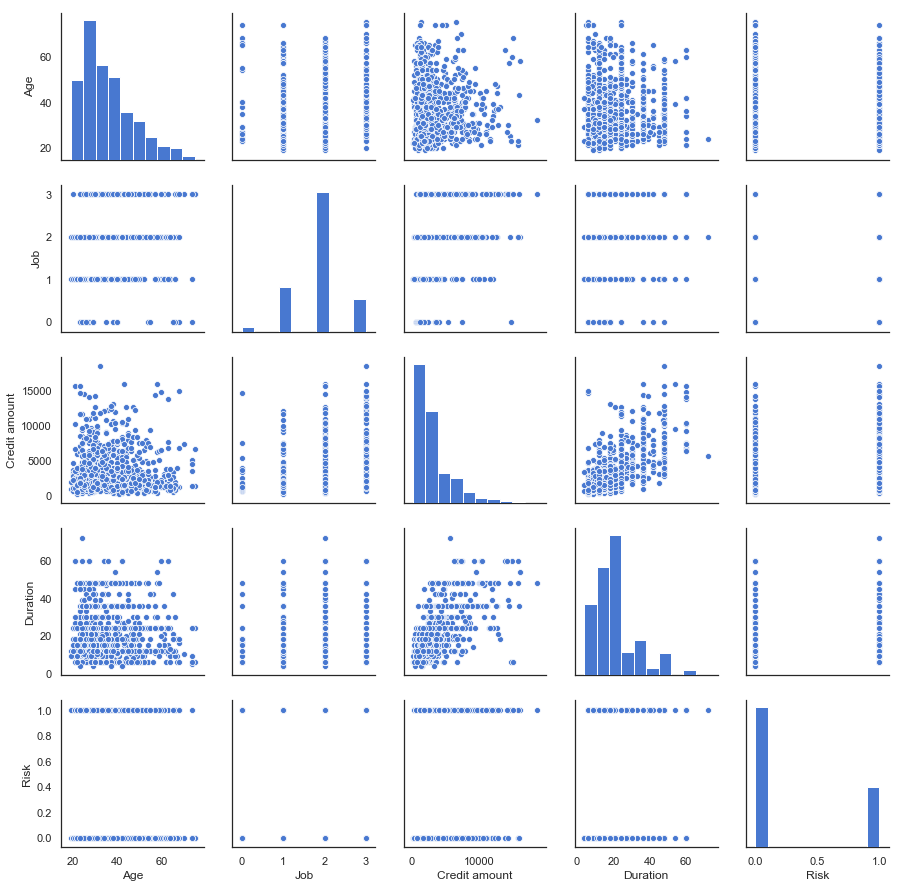

In [95]:
sns.pairplot(df)

# Data Preprocessing

In [98]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])
df['Housing'] = le.fit_transform(df['Housing'])
df['Purpose'] = le.fit_transform(df['Purpose'])
df['Risk'] = le.fit_transform(df['Risk'])
df['Saving accounts'] = le.fit_transform(df['Saving accounts'])
df['Checking account'] = le.fit_transform(df['Checking account'])

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [99]:
df.head(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,2,0,1169,6,5,0
1,22,0,2,1,0,1,5951,48,5,1
2,49,1,1,1,0,2,2096,12,3,0
3,45,1,2,0,0,0,7882,42,4,0
4,53,1,2,0,0,0,4870,24,1,1


## Feature Selection

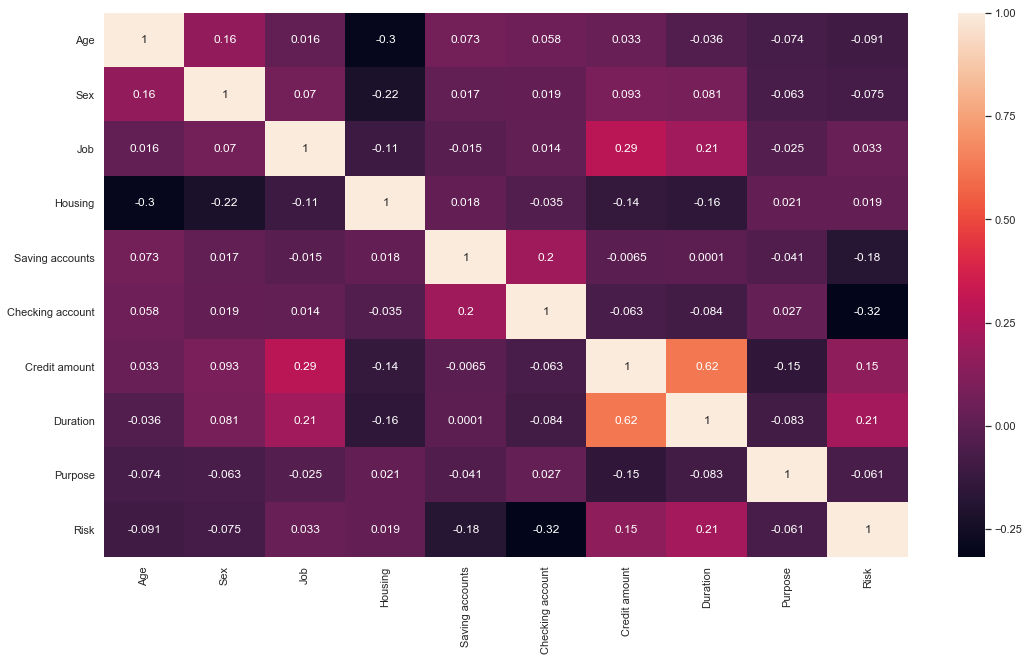

In [100]:
corr = df.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr, annot = True)
plt.show()

## Standartization

In [116]:
x = df[df.columns[:-1]].values
y = df['Risk'].values

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [120]:
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

# Building Model 

## Random Forest

In [134]:
rfc_clf = RandomForestClassifier()
params = {'n_estimators':[25,50,100,150,200,500],
          'max_depth':[0.5,1,5,10],
          'random_state':[1,10,20,42],
          'n_jobs':[1,2]}
grid_search_cv = GridSearchCV(rfc_clf, params, scoring='precision')
grid_search_cv.fit(X_train, y_train)

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning:

You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\m

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarnin

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarnin

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarnin

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarnin

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarnin

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarnin

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarnin

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarnin

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarnin

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarnin

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarnin

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarnin

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarnin

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarnin

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [25, 50, 100, 150, 200, 500], 'max_depth': [0.5, 1, 5, 10], 'random_state': [1, 10, 20, 42], 'n_jobs': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='precision', verbose=0)

In [135]:
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_params_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=20, verbose=0, warm_start=False)
{'max_depth': 5, 'n_estimators': 25, 'n_jobs': 1, 'random_state': 20}


In [164]:
rfc_clf = grid_search_cv.best_estimator_
rfc_clf.fit(X_train,y_train)
rfc_clf_pred = rfc_clf.predict(X_test)
print('Accuracy:',accuracy_score(rfc_clf_pred,y_test) )
print("Confusion matrix:\n", confusion_matrix(y_test, rfc_clf_pred))
print('\n')
print(classification_report(rfc_clf_pred,y_test))

# Let's make sure the data is not overfitting
score_rfc = cross_val_score(rfc_clf,X_train,y_train,cv = 10).mean()
print('cross val score:', score_rfc)

Accuracy: 0.715
Confusion matrix:
 [[126  15]
 [ 42  17]]


              precision    recall  f1-score   support

           0       0.89      0.75      0.82       168
           1       0.29      0.53      0.37        32

   micro avg       0.71      0.71      0.71       200
   macro avg       0.59      0.64      0.59       200
weighted avg       0.80      0.71      0.74       200

cross val score: 0.7200226597905923


## Naive Bayes Classifier 

In [143]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()

# Fitting with train data
gnb_clf = GNB.fit(X_train, y_train)

In [144]:
gnb_clf.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [145]:
print("Training score data: ")
print(gnb_clf.score(X_train, y_train))

Training score data: 
0.73625


In [165]:
gnb_clf_pred = model.predict(X_test)

print("Accuracy: ", accuracy_score(y_test,gnb_clf_pred))
print("\n")
print("Confusion matrix:\n", confusion_matrix(y_test, gnb_clf_pred))
print("\n")
print(classification_report(y_test, gnb_clf_pred))

Accuracy:  0.71


Confusion matrix:
 [[122  19]
 [ 39  20]]


              precision    recall  f1-score   support

           0       0.76      0.87      0.81       141
           1       0.51      0.34      0.41        59

   micro avg       0.71      0.71      0.71       200
   macro avg       0.64      0.60      0.61       200
weighted avg       0.69      0.71      0.69       200



## Support Vector Classifdier 

In [185]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

params = {'C': [0.75, 0.85, 0.95, 1], 
          'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
          'degree': [3, 4, 5]}

svc_clf = SVC(random_state=42)
grid_search_cv = GridSearchCV(svc_clf, params)
grid_search_cv.fit(X_train, y_train)

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning:

You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning:

The default va

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:19

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:19

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.75, 0.85, 0.95, 1], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [148]:
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_params_)

SVC(C=0.95, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False)
{'C': 0.95, 'degree': 3, 'kernel': 'rbf'}


In [150]:
svc_clf = grid_search_cv.best_estimator_
svc_clf.fit(X_train,y_train)
svc_pred = svc_clf.predict(X_test)

print('Accuracy:',accuracy_score(svc_pred,y_test) )
print('Confusion Matrix:\n', confusion_matrix(y_test, svc_pred)) #tn,fp,fn,tp
print('\n')
print(classification_report(svc_pred,y_test))

# Let's make sure the data is not overfitting
score_svc = cross_val_score(svc_clf,X_train,y_train, cv = 10).mean()
print('cross val score:', score_svc)

Accuracy: 0.76
Confusion Matrix:
 [[135   6]
 [ 42  17]]


              precision    recall  f1-score   support

           0       0.96      0.76      0.85       177
           1       0.29      0.74      0.41        23

   micro avg       0.76      0.76      0.76       200
   macro avg       0.62      0.75      0.63       200
weighted avg       0.88      0.76      0.80       200

cross val score: 0.7375543053602126


C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:19

## KNN

In [177]:
from sklearn.neighbors import KNeighborsClassifier
params = {'leaf_size': [10, 20, 30], 
          'n_jobs': [1,2,None],
          'n_neighbors': [3, 5, 7, 9]
         }

knn_clf = KNeighborsClassifier()
grid_search_cv = GridSearchCV(knn_clf, params)
grid_search_cv.fit(X_train, y_train)

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning:

You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.



GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'leaf_size': [10, 20, 30], 'n_jobs': [1, 2, None], 'n_neighbors': [3, 5, 7, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [178]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [179]:
knn_clf_pred = knn_clf.predict(X_test)

print('Accuracy:',accuracy_score(knn_clf_pred,y_test) )
print('Confusion Matrix:\n', confusion_matrix(y_test, knn_clf_pred)) #tn,fp,fn,tp
print('\n')
print(classification_report(knn_clf_pred,y_test))

# Let's make sure the data is not overfitting
score_knn = cross_val_score(knn_clf,X_train,y_train, cv = 10).mean()
print('cross val score:', score_knn)

Accuracy: 0.73
Confusion Matrix:
 [[123  18]
 [ 36  23]]


              precision    recall  f1-score   support

           0       0.87      0.77      0.82       159
           1       0.39      0.56      0.46        41

   micro avg       0.73      0.73      0.73       200
   macro avg       0.63      0.67      0.64       200
weighted avg       0.77      0.73      0.75       200

cross val score: 0.6812552742616035


## Logistic Regfession 

In [151]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

print('Accuracy:',accuracy_score(lr_pred,y_test) )
print('Confusion Matrix:\n', confusion_matrix(y_test, lr_pred))
print('\n')
print(classification_report(lr_pred,y_test))

# Let's make sure the data is not overfitting
score_lr = cross_val_score(lr,X_train,y_train,cv=10).mean()
print('cross val score:', score_lr)

Accuracy: 0.77
Confusion Matrix:
 [[132   9]
 [ 37  22]]


              precision    recall  f1-score   support

           0       0.94      0.78      0.85       169
           1       0.37      0.71      0.49        31

   micro avg       0.77      0.77      0.77       200
   macro avg       0.65      0.75      0.67       200
weighted avg       0.85      0.77      0.80       200

cross val score: 0.7175693467729334


C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:

# Model Selection

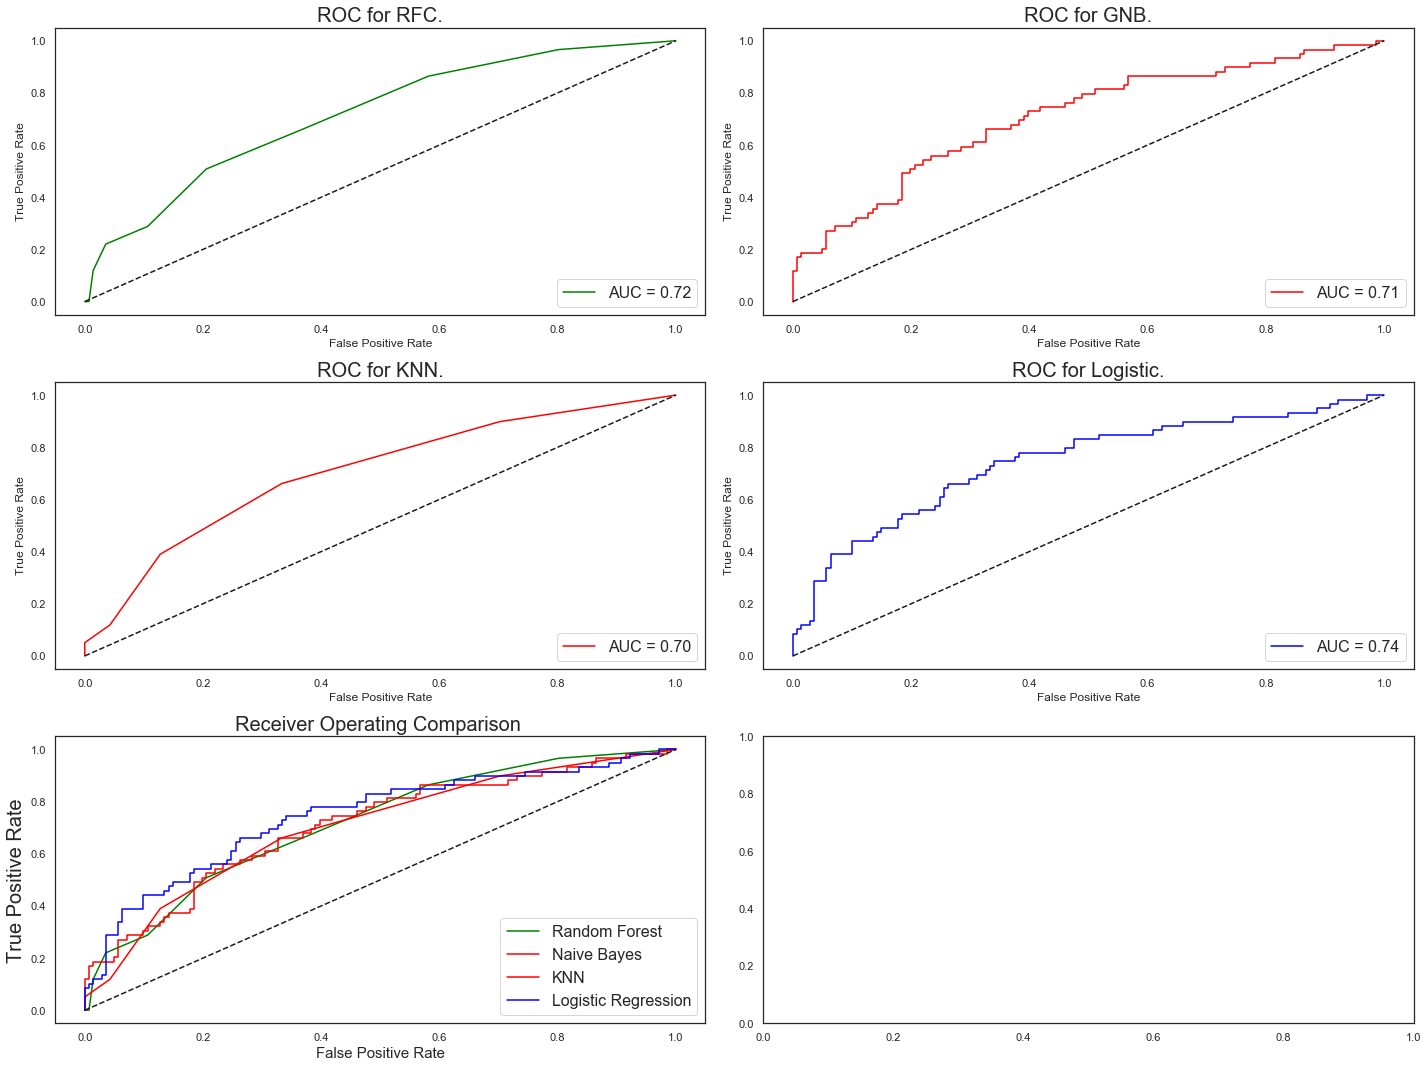

In [184]:
fig, ax_arr = plt.subplots(nrows = 3, ncols = 2, figsize = (20,15))

from sklearn import metrics

#Random forest
rfc_prob = rfc_clf.predict_proba(X_test)[:,1]
fprRfc, tprRfc, thresholdsRfc = metrics.roc_curve(y_test, rfc_prob)
roc_auc_rfc = metrics.auc(fprRfc,tprRfc)
ax_arr[0,0].plot(fprRfc, tprRfc,'b',label = 'AUC = %0.2f' % roc_auc_rfc,color = 'green')
ax_arr[0,0].plot([0, 1], [0, 1], 'k--')
ax_arr[0,0].set_xlabel('False Positive Rate')
ax_arr[0,0].set_ylabel('True Positive Rate')
ax_arr[0,0].set_title('ROC for RFC.', fontsize = 20)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})

#Gaussian NB Classifier
gbc_prob = gnb_clf.predict_proba(X_test)[:,1]
fprgnb, tprgnb, thresholdsgbc = metrics.roc_curve(y_test, gbc_prob)
roc_auc_gbc = metrics.auc(fprgnb,tprgnb)
ax_arr[0,1].plot(fprgnb, tprgnb,'b',label = 'AUC = %0.2f' % roc_auc_gbc,color = 'red')
ax_arr[0,1].plot([0, 1], [0, 1], 'k--')
ax_arr[0,1].set_xlabel('False Positive Rate')
ax_arr[0,1].set_ylabel('True Positive Rate')
ax_arr[0,1].set_title('ROC for GNB.', fontsize = 20)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})

#KNN classifier
knn_prob = knn_clf.predict_proba(X_test)[:,1]
fprknn, tprknn, thresholdsgbc = metrics.roc_curve(y_test, knn_prob)
roc_auc_gbc = metrics.auc(fprknn,tprknn)
ax_arr[1,0].plot(fprknn, tprknn,'b',label = 'AUC = %0.2f' % roc_auc_gbc,color = 'red')
ax_arr[1,0].plot([0, 1], [0, 1], 'k--')
ax_arr[1,0].set_xlabel('False Positive Rate')
ax_arr[1,0].set_ylabel('True Positive Rate')
ax_arr[1,0].set_title('ROC for KNN.', fontsize = 20)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})

#Logistic Regression
lr_prob = lr.predict_proba(X_test)[:,1]
fprLr, tprLr, thresholdsLr = metrics.roc_curve(y_test, lr_prob)
roc_auc_lr = metrics.auc(fprLr,tprLr)
ax_arr[1,1].plot(fprLr, tprLr,'b',label = 'AUC = %0.2f' % roc_auc_lr,color = 'blue')
ax_arr[1,1].plot([0, 1], [0, 1], 'k--')
ax_arr[1,1].set_xlabel('False Positive Rate')
ax_arr[1,1].set_ylabel('True Positive Rate')
ax_arr[1,1].set_title('ROC for Logistic.', fontsize = 20)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})

#For All
ax_arr[2,0].plot(fprRfc,tprRfc, label ='Random Forest', color = 'green')
ax_arr[2,0].plot(fprgnb,tprgnb, label ='Naive Bayes', color = 'red')
ax_arr[2,0].plot(fprknn,tprknn, label ='KNN', color = 'red')
ax_arr[2,0].plot(fprLr,tprLr, label ='Logistic Regression', color = 'blue')
ax_arr[2,0].plot([0, 1], [0, 1], 'k--')
ax_arr[2,0].set_title('Receiver Operating Comparison ',fontsize=20)
ax_arr[2,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[2,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[2,0].legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 
plt.show()

# Conclusion

## After the testing 5 models:
Random Forest
Naive Bayes Classifier
Support Vector Classifier
KNN
Logistic Regression
And after the calculating AUC score, I came to the conclusion that LogReg shows the best result with the score 0.74

# Feauture work
As the project for future, I prefer to spend more time on analyzing of each columns (for example fullfilling NULL values).
Also, it's a good point to tune the chosen model, which is Logistic Regression.